In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

import os
MUSIC_PATH = "music"

csv_path = os.path.join(MUSIC_PATH, "music_genre.csv")
data = pd.read_csv(csv_path)

data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [221]:
drop_list = {
    'instance_id',
    'track_name'
}

data = data.drop(drop_list, axis=1)

data

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,Röyksopp,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,Roy Woods,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,Berner,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,The-Dream,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [222]:
print(data.isnull().sum())

data = data.dropna()



artist_name         5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64


In [223]:
data['obtained_date'].value_counts()

data = data.drop('obtained_date', axis=1)

data

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,0.330,Hip-Hop
50001,Roy Woods,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
50002,Berner,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
50003,The-Dream,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,0.354,Hip-Hop


In [224]:
print(data['duration_ms'].value_counts())

data = data.drop('duration_ms', axis=1)

data

-1.0         4939
 240000.0      33
 192000.0      32
 180000.0      28
 216000.0      20
             ... 
 154574.0       1
 359213.0       1
 656213.0       1
 506320.0       1
 189483.0       1
Name: duration_ms, Length: 26028, dtype: int64


,artist_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,59.0,0.03340,0.913,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,0.330,Hip-Hop
50001,Roy Woods,72.0,0.15700,0.709,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
50002,Berner,51.0,0.00597,0.693,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
50003,The-Dream,65.0,0.08310,0.782,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,0.354,Hip-Hop


In [225]:
# print(data['key'].value_counts())
# print('--------------------------------------------------------')
# print(data['popularity'].value_counts())
# print('--------------------------------------------------------')
# print(data['loudness'].value_counts())
# print('--------------------------------------------------------')
print(data['artist_name'].value_counts())

data = data.drop('artist_name', axis=1)

data

empty_field                2489
Nobuo Uematsu               429
Wolfgang Amadeus Mozart     402
Ludwig van Beethoven        317
Johann Sebastian Bach       314
                           ... 
Ward Davis                    1
A.A. Bondy                    1
Iris DeMent                   1
Mac Davis                     1
Millonario                    1
Name: artist_name, Length: 6863, dtype: int64


,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,0.330,Hip-Hop
50001,72.0,0.15700,0.709,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
50002,51.0,0.00597,0.693,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
50003,65.0,0.08310,0.782,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,0.354,Hip-Hop


In [226]:
# print(data['acousticness'].value_counts())
# print('--------------------------------------------------------')
# print(data['danceability'].value_counts())
# print('--------------------------------------------------------')
# print(data['energy'].value_counts())
# print('--------------------------------------------------------')
# print(data['instrumentalness'].value_counts())
# print('--------------------------------------------------------')
# print(data['liveness'].value_counts())
# print('--------------------------------------------------------')
# print(data['mode'].value_counts())
# print('--------------------------------------------------------')
print(data['speechiness'].value_counts())
print('--------------------------------------------------------')
print(data['tempo'].value_counts())

data = data.drop('tempo', axis=1)

data

0.0332    173
0.0337    155
0.0315    153
0.0329    152
0.0362    148
         ... 
0.7950      1
0.7080      1
0.6830      1
0.8590      1
0.8550      1
Name: speechiness, Length: 1337, dtype: int64
--------------------------------------------------------
?                     4980
140.007                 17
120.0                   17
100.00299999999999      16
100.014                 15
                      ... 
137.046                  1
136.378                  1
93.041                   1
113.98200000000001       1
99.20100000000001        1
Name: tempo, Length: 29394, dtype: int64


,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,0.330,Hip-Hop
50001,72.0,0.15700,0.709,0.362,0.00000,B,0.109,-9.814,Major,0.0550,0.113,Hip-Hop
50002,51.0,0.00597,0.693,0.763,0.00000,D,0.143,-5.443,Major,0.1460,0.395,Hip-Hop
50003,65.0,0.08310,0.782,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,0.354,Hip-Hop


In [227]:
print(data['valence'].value_counts())
print('--------------------------------------------------------')
print(data['music_genre'].value_counts())

data

0.3380    100
0.3240     95
0.3320     93
0.3510     91
0.3700     87
         ... 
0.0931      1
0.0576      1
0.0247      1
0.9900      1
0.0292      1
Name: valence, Length: 1615, dtype: int64
--------------------------------------------------------
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64


,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,0.330,Hip-Hop
50001,72.0,0.15700,0.709,0.362,0.00000,B,0.109,-9.814,Major,0.0550,0.113,Hip-Hop
50002,51.0,0.00597,0.693,0.763,0.00000,D,0.143,-5.443,Major,0.1460,0.395,Hip-Hop
50003,65.0,0.08310,0.782,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,0.354,Hip-Hop


In [228]:
# data = data.sample(n=1000)

X = data.drop('music_genre', axis=1)
y = data['music_genre']

X

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence
0,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,0.759
1,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,0.531
2,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,0.333
3,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,0.270
4,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,0.323
...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,0.330
50001,72.0,0.15700,0.709,0.362,0.00000,B,0.109,-9.814,Major,0.0550,0.113
50002,51.0,0.00597,0.693,0.763,0.00000,D,0.143,-5.443,Major,0.1460,0.395
50003,65.0,0.08310,0.782,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,0.354


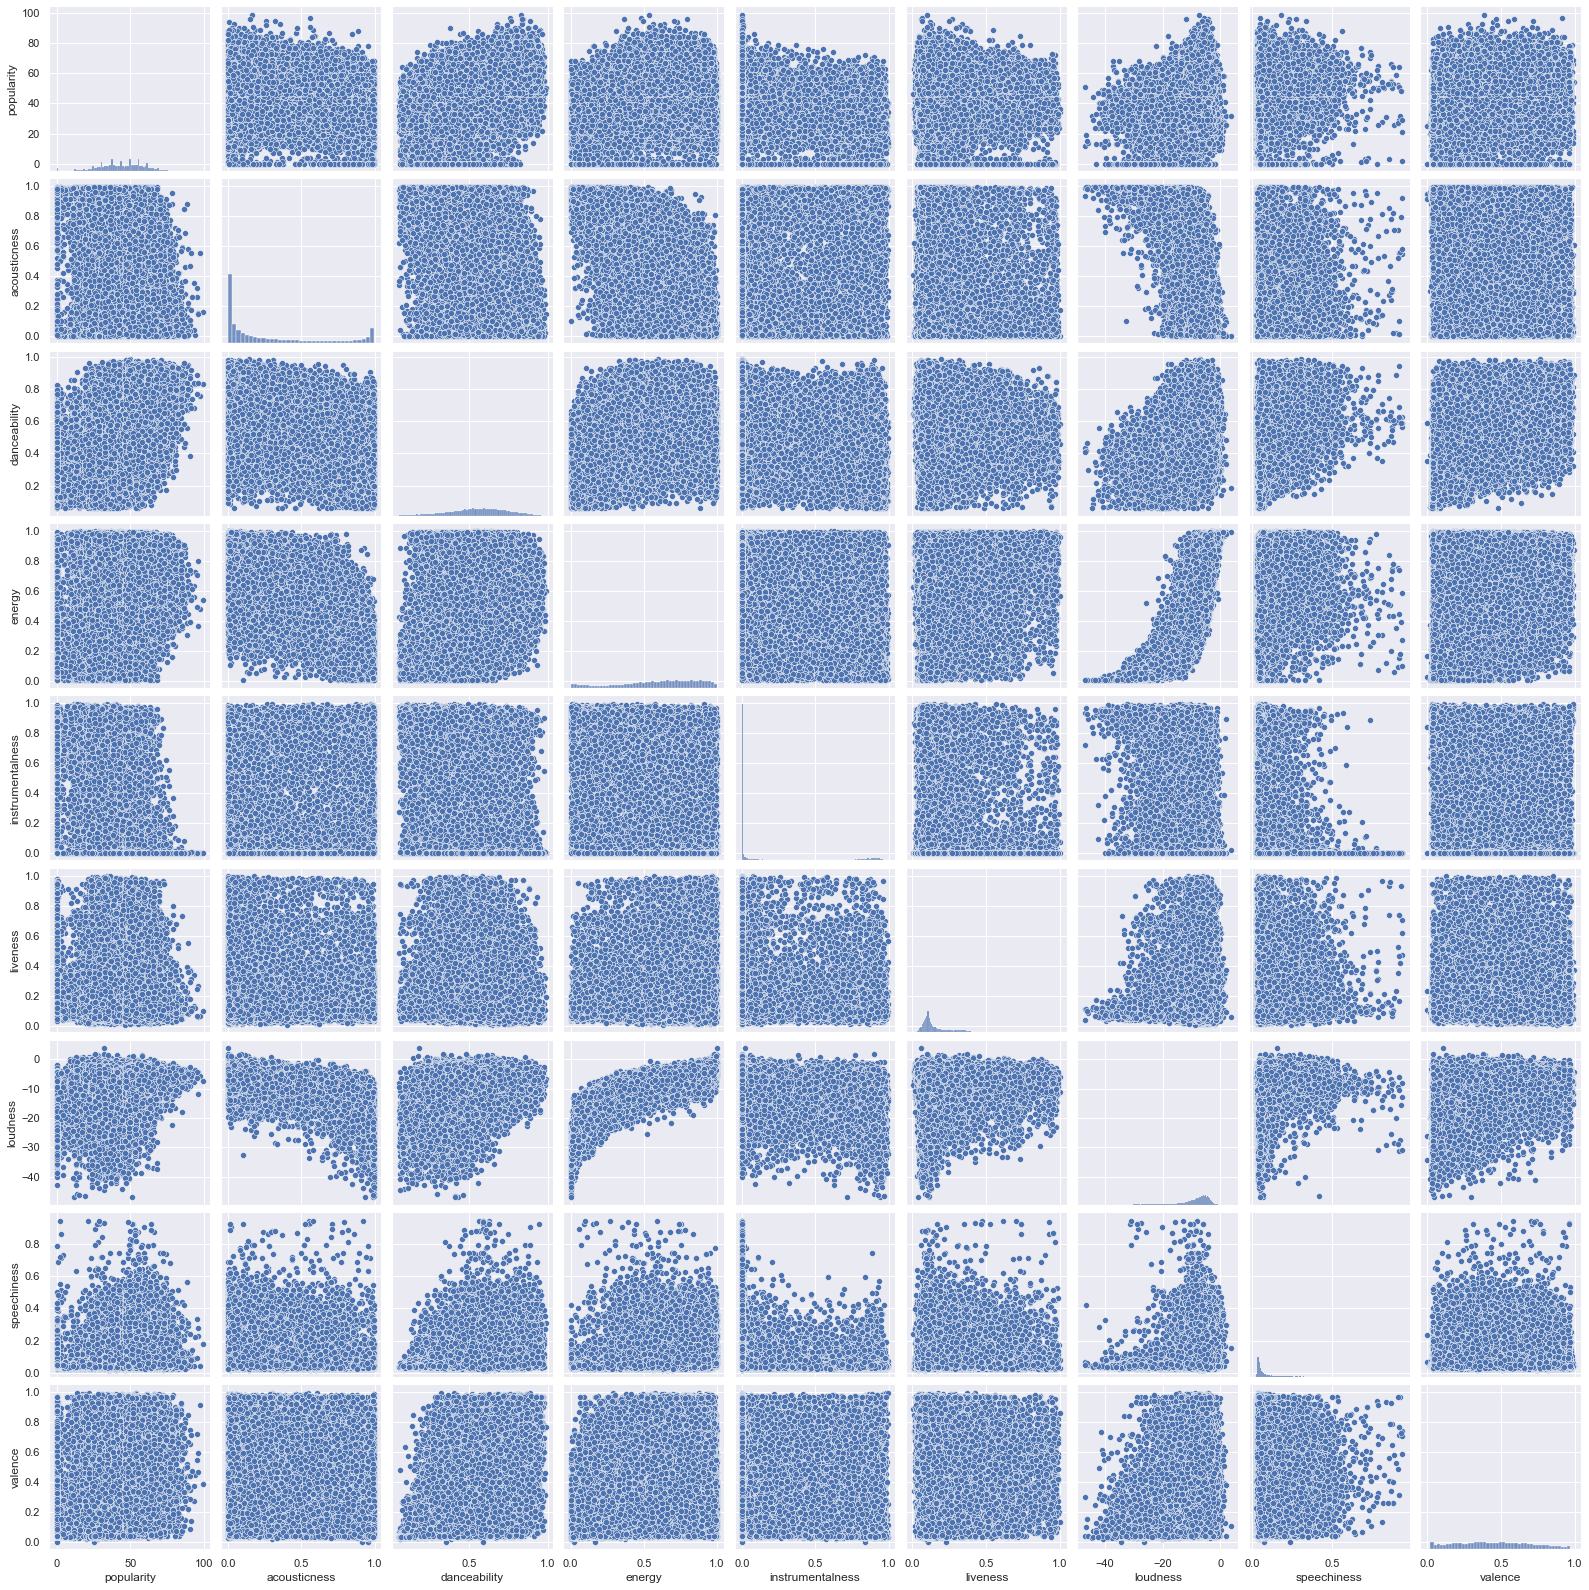

In [229]:
import seaborn as sns

df=pd.DataFrame(data)
sns.pairplot(df)
plt.show()

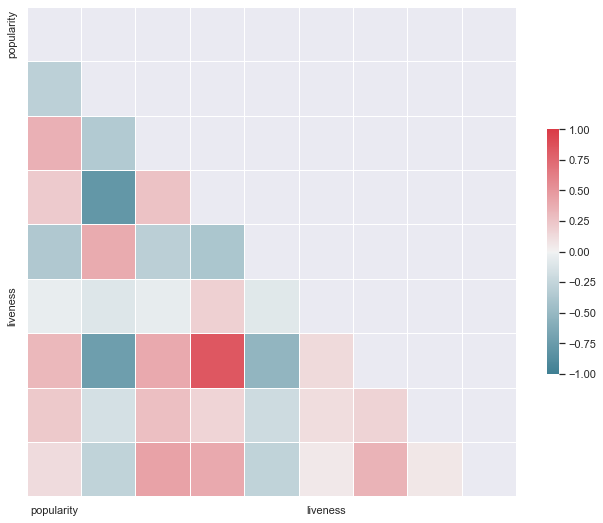

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.000000,-0.290453,0.356420,0.216345,-0.364960,-0.039468,0.317941,0.224309,0.124913
acousticness,-0.290453,1.000000,-0.347681,-0.791250,0.387970,-0.109220,-0.730401,-0.163377,-0.270238
danceability,0.356420,-0.347681,1.000000,0.263934,-0.301277,-0.051465,0.390859,0.279767,0.434557
energy,0.216345,-0.791250,0.263934,1.000000,-0.389730,0.186731,0.838399,0.158180,0.396317
instrumentalness,-0.364960,0.387970,-0.301277,-0.389730,1.000000,-0.093537,-0.529030,-0.199137,-0.272780
liveness,-0.039468,-0.109220,-0.051465,0.186731,-0.093537,1.000000,0.126504,0.114475,0.052110
loudness,0.317941,-0.730401,0.390859,0.838399,-0.529030,0.126504,1.000000,0.165578,0.340664
speechiness,0.224309,-0.163377,0.279767,0.158180,-0.199137,0.114475,0.165578,1.000000,0.059847
valence,0.124913,-0.270238,0.434557,0.396317,-0.272780,0.052110,0.340664,0.059847,1.000000


In [230]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

In [231]:
# y

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])

print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (50000, 11) y.shape: (50000,)


In [232]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'])),
        ("imputer", SimpleImputer(strategy="median")),
    ])

# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

# from future_encoders import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(['key', 'mode'])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [233]:
preprocess_pipeline.fit_transform(X).shape


(50000, 23)

In [234]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [235]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)

In [236]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', SGDClassifier())])


param_grid = {
    'classifier__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'classifier__max_iter': [20000, 30000, 40000], # number of epochs
    'classifier__loss': ['log', 'perceptron', 'hinge', 'modified_huber'], # logistic regression,
    'classifier__penalty': ['l1', 'l2'],
    'classifier__n_jobs': [-1]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_1.fit(X_train, y_train)
grid_1.best_params_

c:\Users\FPro\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\FPro\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\FPro\anaconda3\envs\tf\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\FPro\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return se

{'classifier__alpha': 0.001,
 'classifier__loss': 'perceptron',
 'classifier__max_iter': 50000,
 'classifier__n_jobs': -1,
 'classifier__penalty': 'l1'}

In [237]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)

pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', softmax_reg)])


param_grid = {
    'classifier__C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'classifier__max_iter': [10000, 15000, 20000], # number of epochs
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 1000.0, 'classifier__max_iter': 10000}

In [238]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', RandomForestClassifier())])


param_grid = {
        'classifier__n_estimators':[10, 15, 20, 25, 30, 35], 
        'classifier__criterion':['entropy', 'gini'], 
        'classifier__min_samples_split':[15, 20], 
        'classifier__min_samples_leaf':[1, 2, 3, 4, 5],
        "classifier__max_depth": [5, 10, 15, 20, 25]
    }

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_3.fit(X_train, y_train)
grid_3.best_params_


c:\Users\FPro\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3000 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\FPro\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\FPro\anaconda3\envs\tf\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\FPro\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  Fil

{'classifier__criterion': 'gini',
 'classifier__max_depth': 10,
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 15,
 'classifier__n_estimators': 35}

In [239]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

keras.backend.clear_session()



def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(23)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dense(n_neurons, activation="elu"))
        model.add(keras.layers.Dropout(0.6))
        n_neurons = int(0.7 * n_neurons)
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    return model

keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)


from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": np.arange(2, 10),
    "n_neurons": np.arange(500, 2000),
    'learning_rate': [1e-4, 1e-3, 1e-2, 1e-1, 1e0]
}


X_train_pr = preprocess_pipeline.fit_transform(X_train)
X_test_pr = preprocess_pipeline.fit_transform(X_test)


grid_4 = RandomizedSearchCV(keras_class, param_distribs, n_iter=2, cv=3, verbose=2)
grid_4.fit(X_train_pr, y_train, epochs=100, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)])

grid_4.best_params_

C:\Users\FPro\AppData\Local\Temp\ipykernel_24208\2514891666.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Epoch 1/100
75/75 [==============================] - 2s 10ms/step - loss: 2.6217 - accuracy: 0.3289 - val_loss: 2.4202 - val_accuracy: 0.2734
Epoch 2/100
75/75 [==============================] - 1s 7ms/step - loss: 2.3136 - accuracy: 0.3752 - val_loss: 1.7865 - val_accuracy: 0.3708
Epoch 3/100
75/75 [==============================] - 1s 7ms/step - loss: 2.1505 - accuracy: 0.3956 - val_loss: 1.5446 - val_accuracy: 0.4157
Epoch 4/100
75/75 [==============================] - 1s 7ms/step - loss: 2.1188 - accuracy: 0.3843 - val_loss: 1.4743 - val_accuracy: 0.4906
Epoch 5/100
75/75 [==============================] - 1s 7ms/step - loss: 1.9789 - accuracy: 0.3964 - val_loss: 1.5254 - val_accuracy: 0.4307
Epoch 6/100
75/75 [==============================] - 1s 7ms/step - loss: 1.7943 - accuracy: 0.4214 - val_loss: 1.4241 - val_accuracy: 0.4794
Epoch 7/100
75/75 [==============================] - 1s 7ms/step - loss: 1.7560 - accuracy: 0.

{'n_neurons': 940, 'n_hidden': 2, 'learning_rate': 0.001}

In [240]:
history = grid_4.best_estimator_.fit(X_train_pr, y_train, epochs=1000, validation_data=(X_test_pr, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)])

Epoch 1/1000
125/125 [==============================] - 1s 7ms/step - loss: 2.5449 - accuracy: 0.3430 - val_loss: 2.0465 - val_accuracy: 0.3260
Epoch 2/1000
125/125 [==============================] - 1s 7ms/step - loss: 2.2615 - accuracy: 0.3650 - val_loss: 1.5857 - val_accuracy: 0.4150
Epoch 3/1000
125/125 [==============================] - 1s 7ms/step - loss: 2.0454 - accuracy: 0.3790 - val_loss: 1.4698 - val_accuracy: 0.4760
Epoch 4/1000
125/125 [==============================] - 1s 7ms/step - loss: 1.8153 - accuracy: 0.3930 - val_loss: 1.4065 - val_accuracy: 0.5020
Epoch 5/1000
125/125 [==============================] - 1s 7ms/step - loss: 1.7073 - accuracy: 0.4168 - val_loss: 1.4418 - val_accuracy: 0.4870
Epoch 6/1000
125/125 [==============================] - 1s 7ms/step - loss: 1.5991 - accuracy: 0.4215 - val_loss: 1.4110 - val_accuracy: 0.4940
Epoch 7/1000
125/125 [==============================] - 1s 7ms/step - loss: 1.5710 - accuracy: 0.4355 - val_loss: 1.3651 - val_accuracy:

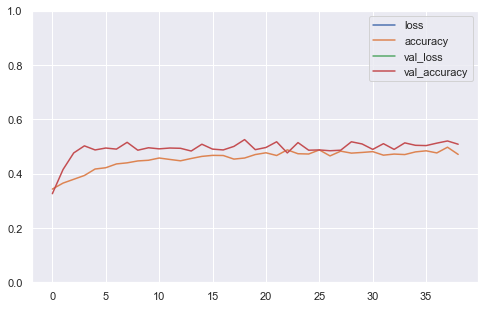

In [245]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [242]:
from sklearn import  metrics
from sklearn.metrics import roc_auc_score


models = []
models.append(('SGD', grid_1.best_estimator_))
models.append(('Softmax', grid_2.best_estimator_))
models.append(('Random Forest', grid_3.best_estimator_))
models.append(('Neuron network', grid_4.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_score = []



for name, model in models:
    X_inn = None
    if name == 'Neuron network':
        X_inn = X_test_pr
    else:
        X_inn = X_test


    precision_score.append(metrics.precision_score(y_test, model.predict(X_inn), zero_division=0, average='weighted'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_inn), zero_division=0, average='weighted'))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_inn), zero_division=0, average='weighted'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_inn)))
    roc_score.append(roc_auc_score(y_test, label_binarize(model.predict(X_inn), classes=[0,1,2,3,4,5,6,7,8,9]), multi_class='ovr'))
   
    # probs = model.predict_proba(X_inn)
    # preds = probs[:,1]
    # fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    # roc_auc = metrics.auc(fpr, tpr)
 
    # # method I: plt
    # import matplotlib.pyplot as plt
    # plt.title('Receiver Operating Characteristic')
    # plt.plot(fpr, tpr, label = '%s AUC = %0.10f' % (name, roc_auc))
    # plt.legend(loc = 'lower right')
    # plt.plot([-0.1, 1.1], [0, 1],'r--')
    # plt.xlim([-0.1, 1.1])
    # plt.ylim([-0.1, 1.1])
    # plt.ylabel('True Positive Rate')
    # plt.xlabel('False Positive Rate')
# plt.show()

In [243]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SGD', 'Softmax', 'Random Forest', 'Neuron network'])
# 'SGD', 'Softmax', 'Random Forest',
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SGD,0.458410,0.397,0.359818,0.397
1,Softmax,0.503054,0.500,0.498097,0.500
2,Random Forest,0.521048,0.520,0.513968,0.520
3,Neuron network,0.529143,0.508,0.493423,0.508
